# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from datetime import timedelta
from datetime import datetime

In [2]:
# set up Splinter
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

# add delay for loading page
browser.is_element_present_by_css('table.table', wait_time=1)

True

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Scrape the website
html = browser.html

# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# find table on webpage
table = soup.find('table')

In [6]:
# create empty lists to store header and row data
headers = []
all_rows = []

In [7]:
# find table header - write column headers to empty list
table_head = table.find_all('th')

for head in table_head:
    title = head.text
    headers.append(title)
    
# preview header list
headers   

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:
# find all rows within table
table_rows = table.find_all('tr', class_="data-row")

# extract table data from each row, append to a list
for tr in table_rows:
    data = tr.find_all('td')
    t_data = [td.text.strip() for td in data]
    all_rows.append(t_data)

In [9]:
# preview first row of non-header data
all_rows[0]

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df_mars_temp = pd.DataFrame(all_rows, columns=headers)

In [11]:
# preview DataFrame
df_mars_temp.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
df_mars_temp.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis
df_mars_temp['id']=df_mars_temp['id'].astype(int)
df_mars_temp['terrestrial_date']=pd.to_datetime(df_mars_temp['terrestrial_date'])
df_mars_temp['sol']=df_mars_temp['sol'].astype(int)
df_mars_temp['ls']=df_mars_temp['ls'].astype(int)
df_mars_temp['month']=df_mars_temp['month'].astype(int)
df_mars_temp['min_temp']=df_mars_temp['min_temp'].astype(float)
df_mars_temp['pressure']=df_mars_temp['pressure'].astype(float)

In [14]:
# confirm all fields have approrpiate datatypes
df_mars_temp.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
number_months = len(df_mars_temp['month'].unique())

print(f"There are {number_months} months on Mars")

There are 12 months on Mars


In [16]:
# 2. How many Martian days' worth of data are there?
distinct_days = df_mars_temp['sol'].nunique()
first_day = df_mars_temp['sol'].min()
last_day = df_mars_temp['sol'].max()

print(f"There are {distinct_days} unique days of data within the data set")
print(f"The earliest day is {first_day} and the latest day is {last_day}")

There are 1867 unique days of data within the data set
The earliest day is 10 and the latest day is 1977


In [17]:
# 3. What is the average low temperature by month?

# generate series to calculate avg - min temp, group by month
by_month = df_mars_temp.groupby(["month"]).mean()["min_temp"]
by_month = round(by_month,2)

# create dataframe based on series
df_avg_min = pd.DataFrame(by_month)

# format dataframe
df_avg_min.index.name = None

df_avg_min.head()

,min_temp
1,-77.16
2,-79.93
3,-83.31
4,-82.75
5,-79.31


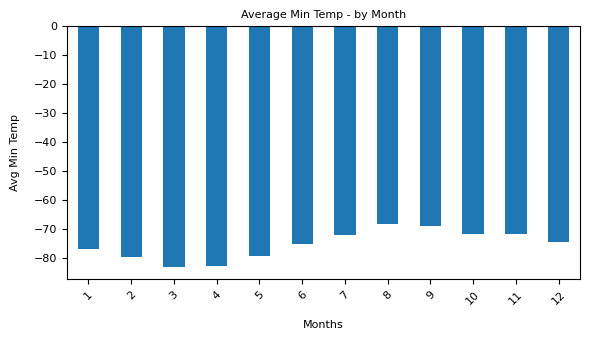

In [18]:
# Plot the average temperature by month
min_temp = plt.figure("min_temp")
min_temp = df_avg_min["min_temp"].plot(kind="bar", figsize = (6,3.5), width = 0.5)


# configure x-tick labels & chart titles/labels
xticklabels = df_avg_min.index
min_temp.set_xticklabels(xticklabels, rotation = 45, fontsize = 8)
min_temp.set_xlabel("Months", labelpad = 10, fontsize = 8)
min_temp.set_ylabel("Avg Min Temp", labelpad = 10, fontsize = 8)
min_temp.set_title("Average Min Temp - by Month", fontsize = 8)

plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [19]:
# Identify the coldest and hottest months in Curiosity's location

# coldest month
coldest = df_avg_min.idxmin()[0]

# hottest month
warmest = df_avg_min.idxmax()[0]

print(f"On average month {coldest} has the coldest minimum temperature on Mars and month {warmest} is the warmest. Either way it is very cold in human terms")

On average month 3 has the coldest minimum temperature on Mars and month 8 is the warmest. Either way it is very cold in human terms


In [20]:
# 4. Average pressure by Martian month

# generate series to calculate avg - pressure, group by month
pressure_month = df_mars_temp.groupby(["month"]).mean()["pressure"]
pressure_month = round(pressure_month,4)

# create dataframe based on series
df_avg_pressure = pd.DataFrame(pressure_month)

# format dataframe
df_avg_pressure.index.name = None

df_avg_pressure.head()

,pressure
1,862.4885
2,889.4551
3,877.3229
4,806.3299
5,748.5570


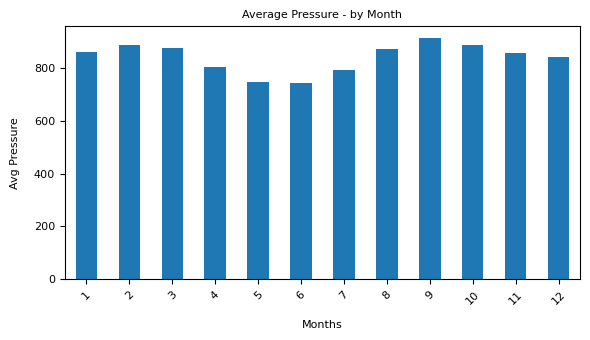

In [21]:
# Plot the average pressure by month
avg_pressure = plt.figure("pressure")
avg_pressure = df_avg_pressure["pressure"].plot(kind="bar", figsize = (6,3.5), width = 0.5)

# configure x-tick labels & chart titles/labels
xticklabels = df_avg_min.index
avg_pressure.set_xticklabels(xticklabels, rotation = 45, fontsize = 8)
avg_pressure.set_xlabel("Months", labelpad = 10, fontsize = 8)
avg_pressure.set_ylabel("Avg Pressure", labelpad = 10, fontsize = 8)
avg_pressure.set_title("Average Pressure - by Month", fontsize = 8)

plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [22]:
# Identify months with lowest and highest pressure

# lowest_pressure
low_p = df_avg_pressure.idxmin()[0]

# hottest month
high_p = df_avg_pressure.idxmax()[0]

print(f"On average month {low_p} has the lowest pressure and month {high_p} has the highest")

On average month 6 has the lowest pressure and month 9 has the highest


In [23]:
# Determine the number of days elapse on earth for 1 year on mars

# find the max solar longitude -- would expect same longitude each year
max_ls = df_mars_temp['ls'].max()

In [24]:
# create new DataFrame filtering records where solar longitude = max_ls
highest_ls = df_mars_temp.loc[df_mars_temp['ls']==max_ls,:]

# reset row index for new DF - do not need to add old index to DF
highest_ls = highest_ls.reset_index(drop=True)

# preview new DF
highest_ls

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,316,2013-07-30,349,359,12,-75.0,852.0
1,318,2013-07-31,350,359,12,-76.0,853.0
2,955,2015-06-17,1017,359,12,-78.0,850.0
3,956,2015-06-18,1018,359,12,-79.0,850.0
4,1607,2017-05-04,1686,359,12,-75.0,838.0
5,1608,2017-05-05,1687,359,12,-75.0,838.0


In [25]:
# calculate the number of days on earth for 1 year on mars

# create variable to identify LY date
last_year = highest_ls['terrestrial_date'].loc[0]

# create variable to identify date in next year on mars --
# if filter LY_date using loc[1] vs loc[0].. then NY date would use loc[3]
next_year = highest_ls['terrestrial_date'].loc[2]

# calculate the number of days between LY and NY
year_length = next_year - last_year

# convert to days
number_days = year_length.days

print(f"There are approximately {number_days} on earth for 1 year on mars")

There are approximately 687 on earth for 1 year on mars


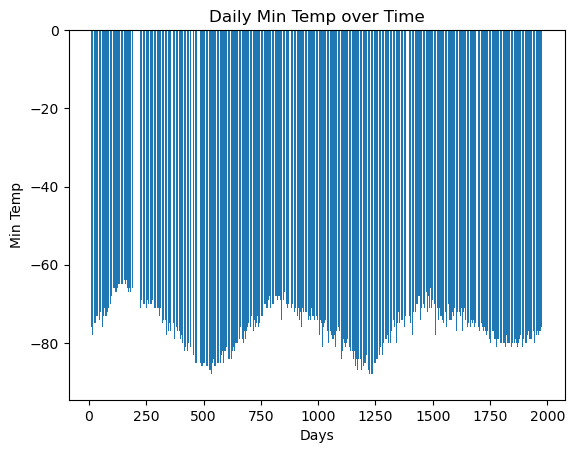

In [26]:
## know logically in US that temperatures are roughly the same each year 

# create a bar char to plot temperature vs. Martian days
plt.bar(df_mars_temp['sol'], df_mars_temp['min_temp'])


# update chart labels/titles
plt.xlabel("Days")
plt.ylabel("Min Temp")
plt.title("Daily Min Temp over Time")

plt.show()

When plotting temperature over time, the graph displays distinct peaks and valleys...
The warmest minimum temperatures occurs roughly at day 150, 825 and 1500... which equates to 700 days which is in line with the calculation  

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
df_mars_temp.to_csv('mars_table.csv',index=False)

In [28]:
browser.quit()